# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [8]:
#LOAD THE DATA
import pandas as pd
import numpy as np

df = pd.read_csv("water_potability.csv")
#Display info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.

Plot the Data Appropriately

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Split features and target
X = df.drop(columns=['Potability'])
y = df['Potability']

# generate 2d classification dataset


# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#from sklearn import train_test_split

from sklearn.model_selection import train_test_split

# Split into Train, Validation, and Test sets (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Each Memeber Defines their model Here

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
def create_model():
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(10,)),  # Adjust input size
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5373 - loss: 0.7094 - val_accuracy: 0.5845 - val_loss: 0.6820
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5715 - loss: 0.6894 - val_accuracy: 0.5866 - val_loss: 0.6688
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5912 - loss: 0.6733 - val_accuracy: 0.5967 - val_loss: 0.6619
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5978 - loss: 0.6708 - val_accuracy: 0.6110 - val_loss: 0.6565
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 0.6622 - val_accuracy: 0.6232 - val_loss: 0.6524
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6088 - loss: 0.6630 - val_accuracy: 0.6395 - val_loss: 0.6467
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6212 - loss: 0.6490 - val_accuracy: 0.6375 - val_loss: 0.6416
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6397 - loss: 0.6432 - val_accuracy: 0.6436 - v

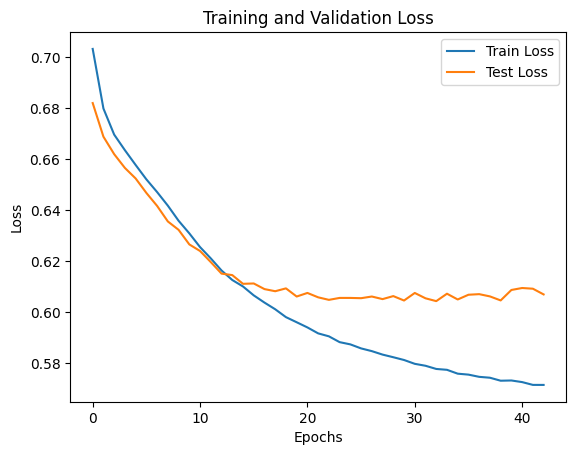

In [16]:
# Create and Train the Model
import matplotlib.pyplot as plt #Import plotting library
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Assuming X_train, y_train, X_test, y_test are your training and testing data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[early_stopping])

# Evaluate the Model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_val, y_val, verbose=0) #Changed to X_val and y_val to prevent data leakage
print(f'Train: {train_acc:.3f}, Test: {test_acc:.3f}')

# Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss') #Changed to 'val_loss' for validation loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()